# Red Wine Quality Classification

## Import and Load Dataset
We need to import some library that will be used in data preprocessing, data manipulation, and modeling.

In [1]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the red wine dataset. The dataset is from UCI Machine Learning and can be downloaded at Kaggle: 

https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009

In [2]:
df = pd.read_csv("dataset/winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Data Understanding

First we want to find basic information from the dataset, like shape, data type, general stats, null values, and duplicate data. Than we will doing some EDA.

In [3]:
df.shape

(1599, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
df.duplicated().sum()

240

Next, we would like to see the distribution of each feature in the dataset. This will be usefull to determine which feature is distributed inbalance.

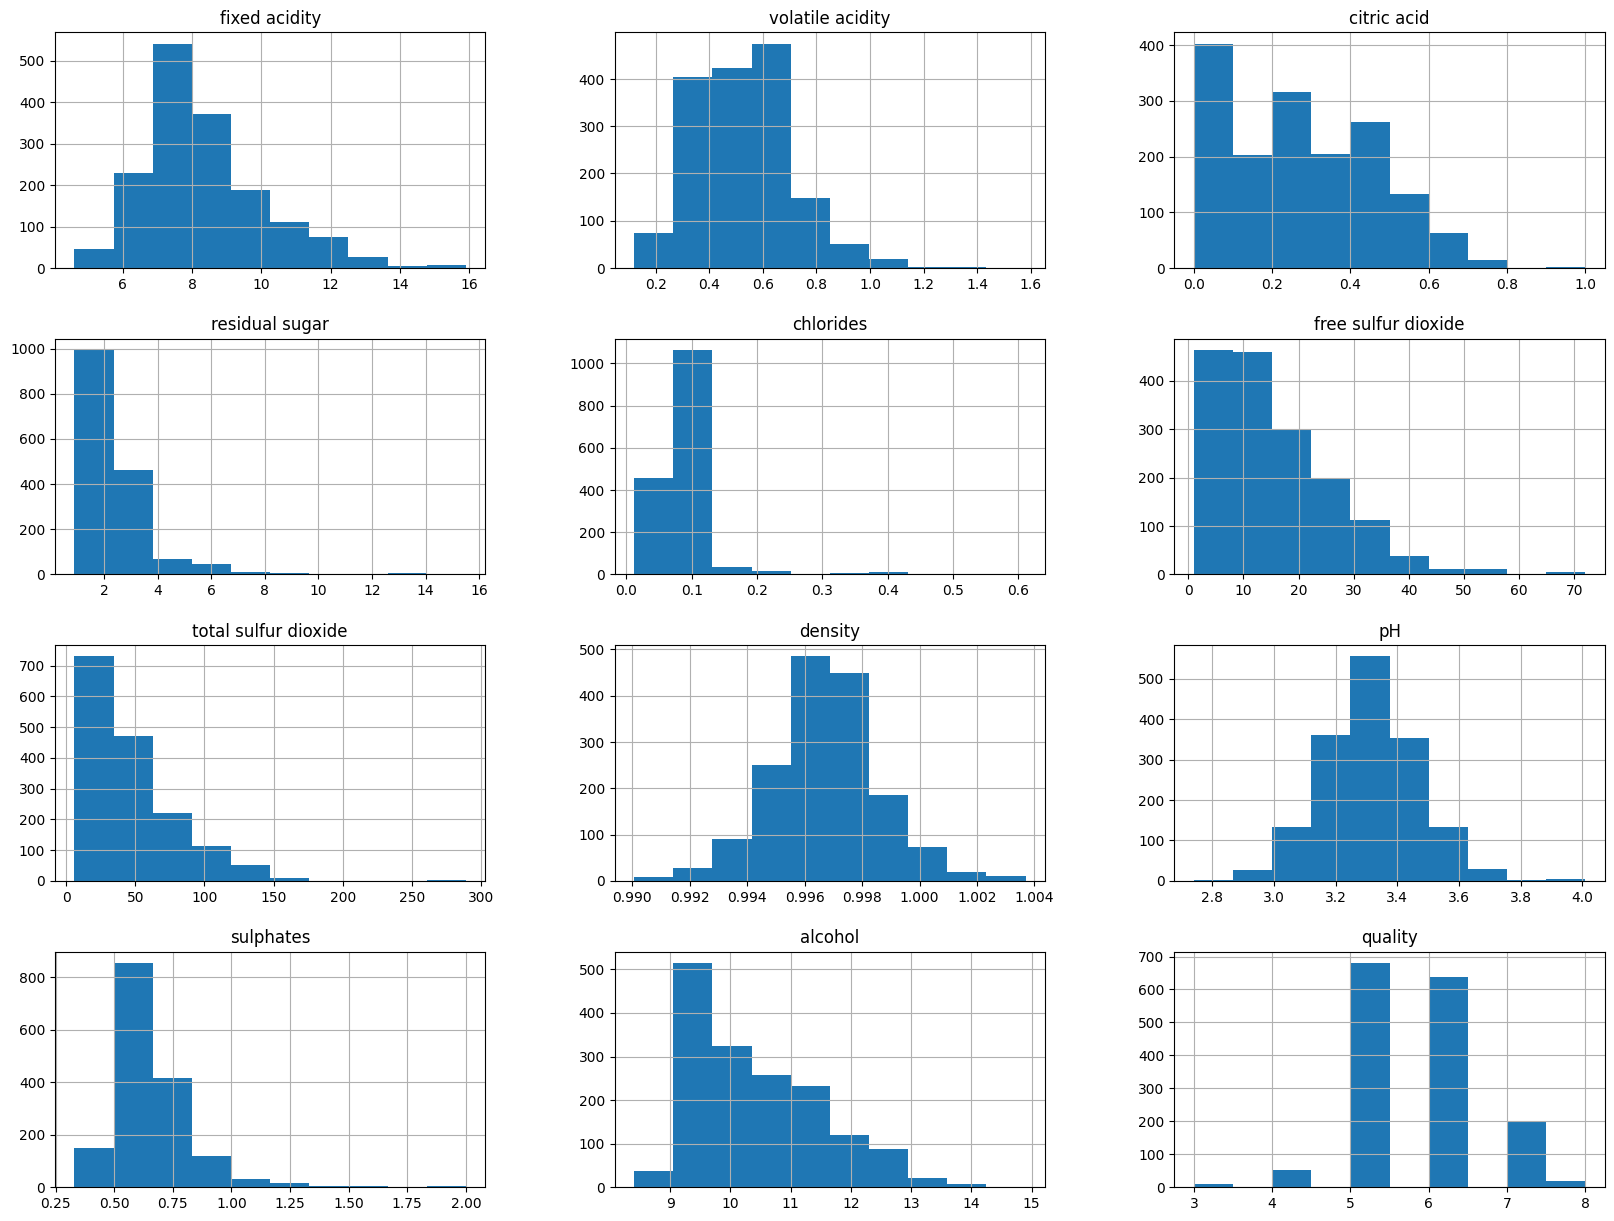

In [8]:
df.hist(bins=10, figsize=(20,15))
plt.savefig("docs/histogram_all_features.png")
plt.show()

From the distribution above, some feature like density and pH seems like have shape of normal distribution. But the other features, like alcohol, residual sugar have right-skewed and feature like chlorides have left-skewed type.  

Next, we will try to some the effect or distribution of each feature vs the quality of the wine.

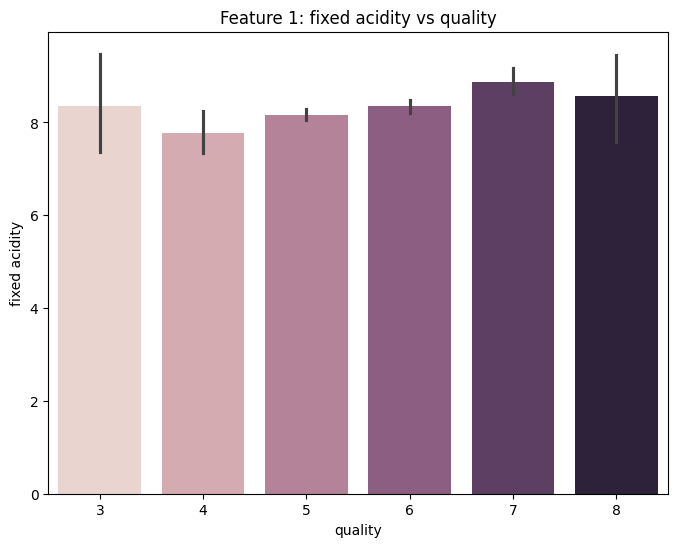

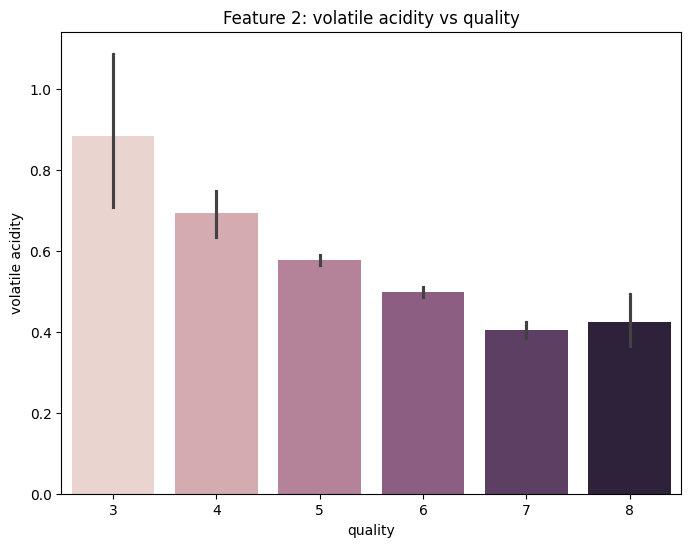

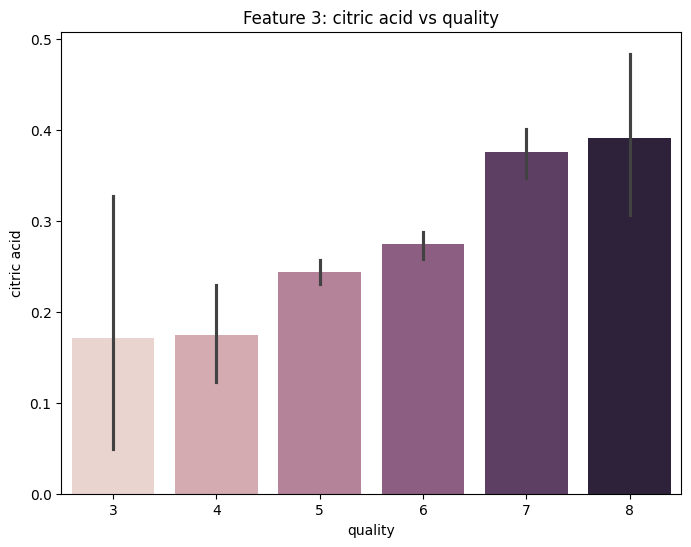

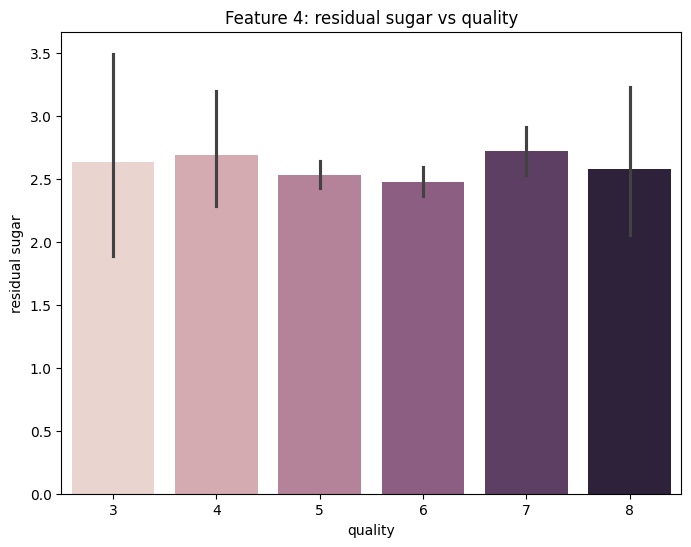

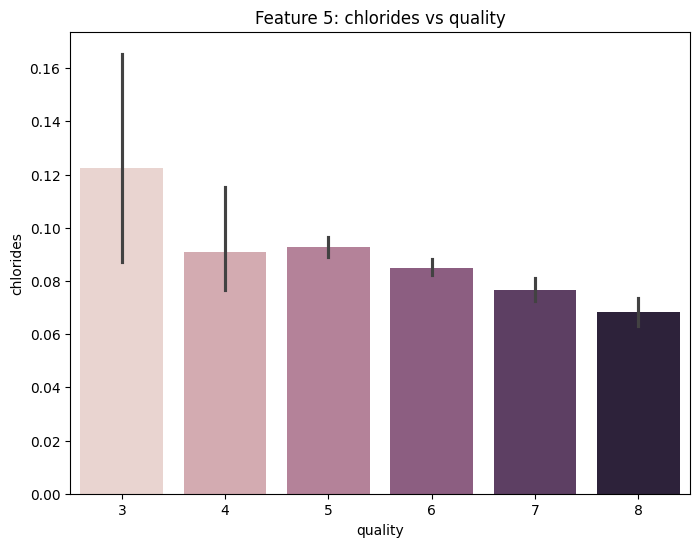

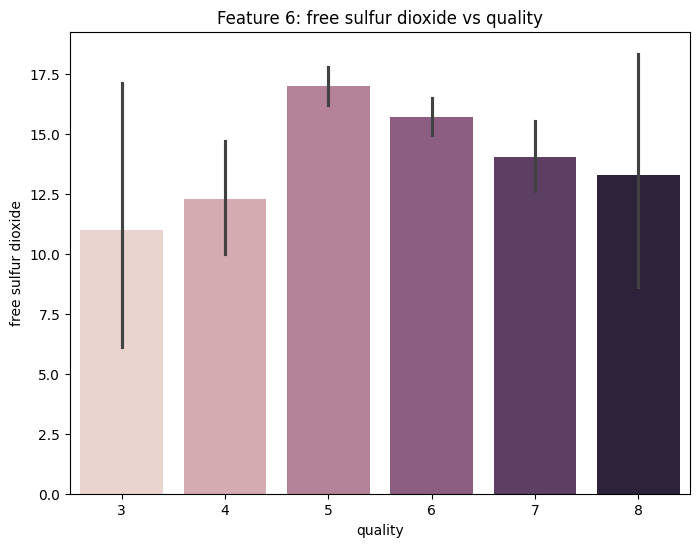

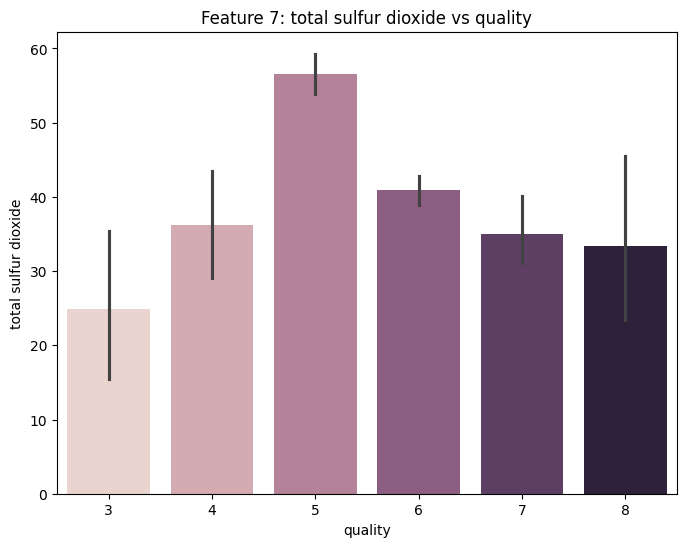

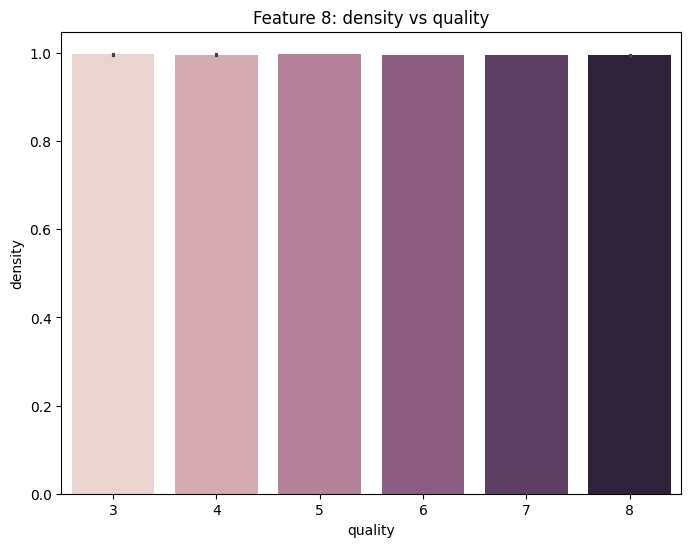

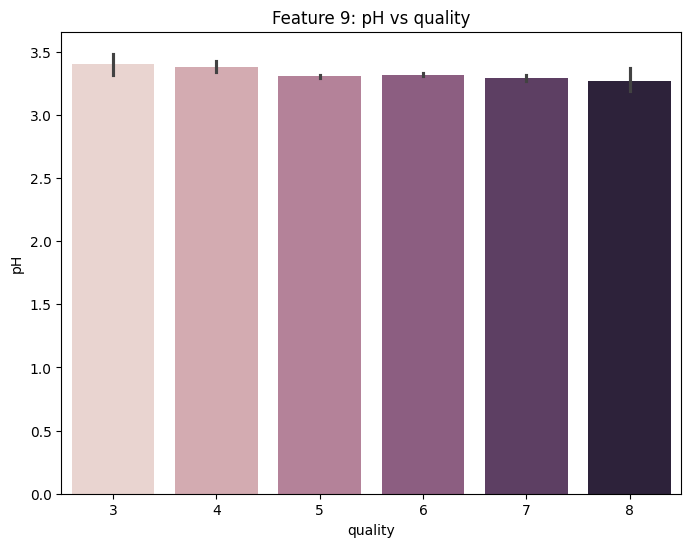

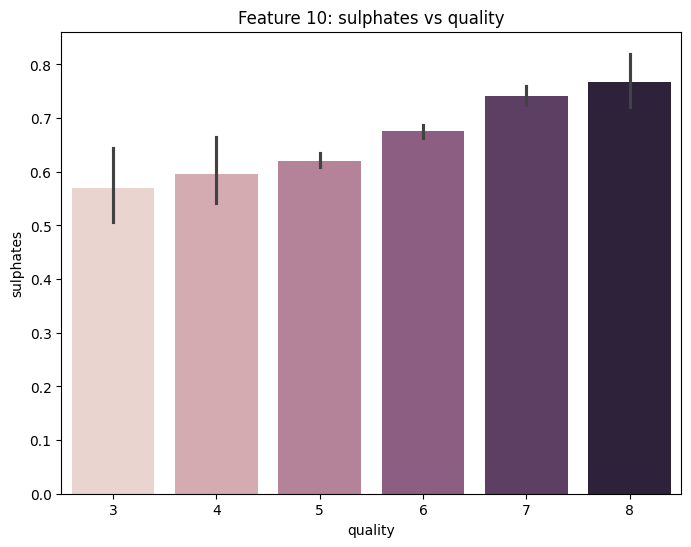

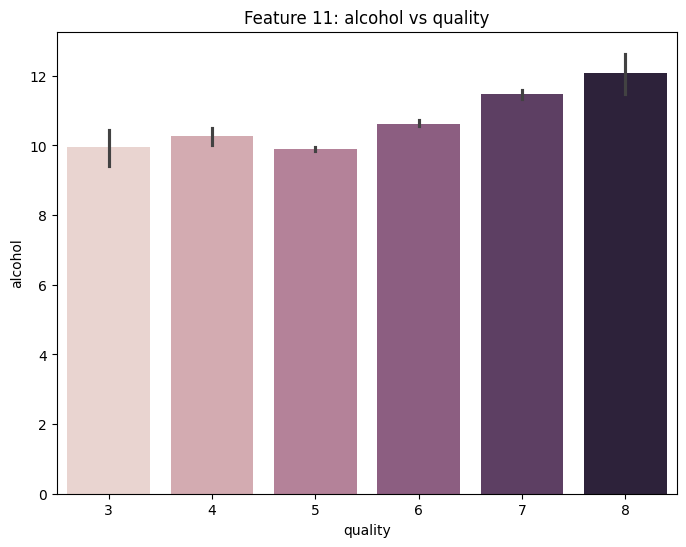

In [9]:
for idx, i in enumerate(df.columns):
    if i == "quality":
        continue
    plt.figure(figsize=(8, 6))
    plt.title(f"Feature {idx+1}: {i} vs quality")
    sns.barplot(x="quality", y=i, data=df, hue="quality", legend=False)
    plt.savefig(f"docs/feature_{i}_vs_quality.png")

From the some of visualization above, we can see that some features like alcohol, sulphates, citric acid, and volatile acidity are highly affecting the quality of the wine (either better of worst).

Next, we will try to understand the distribution of each feature, so we can analyze the outliers and remove them.

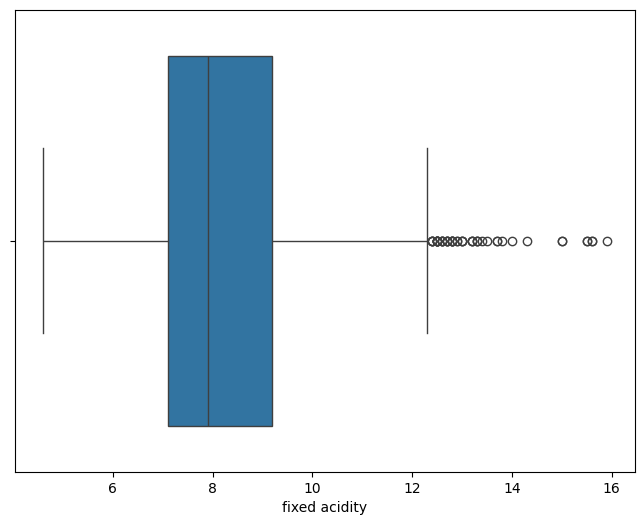

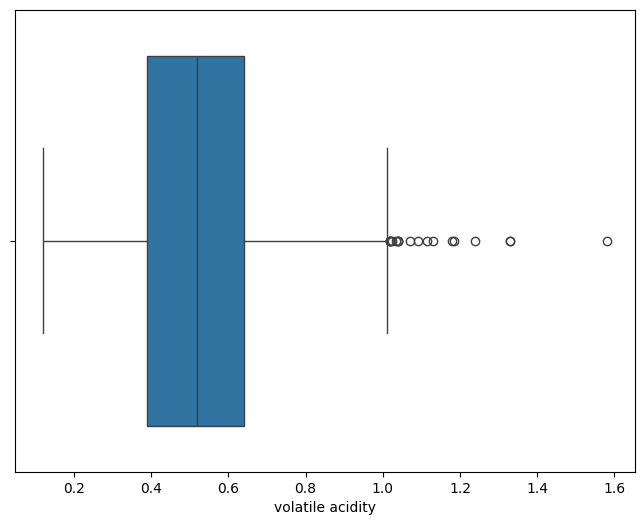

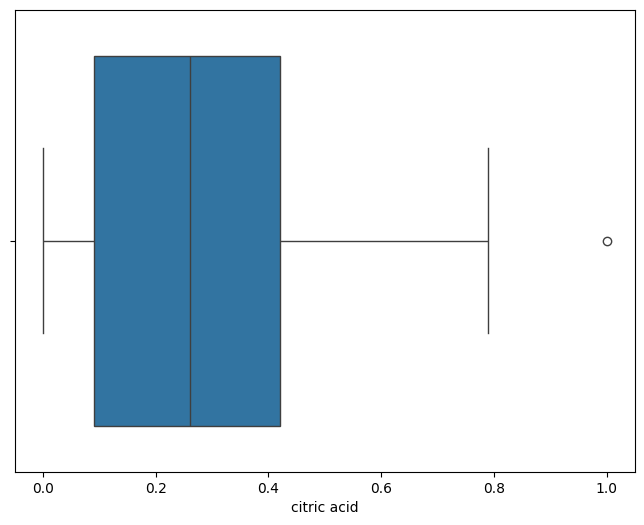

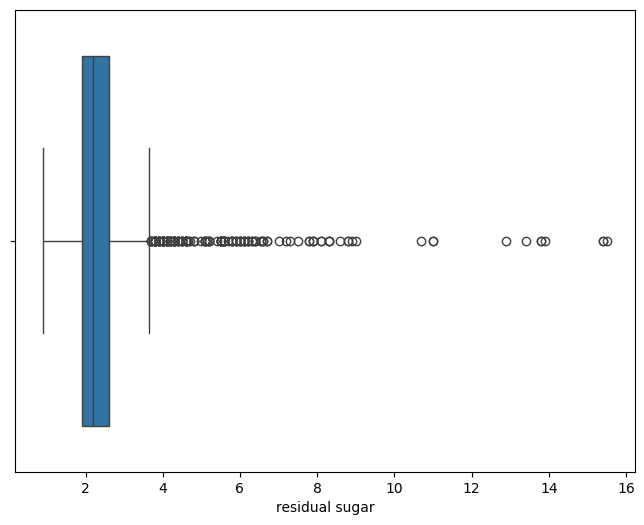

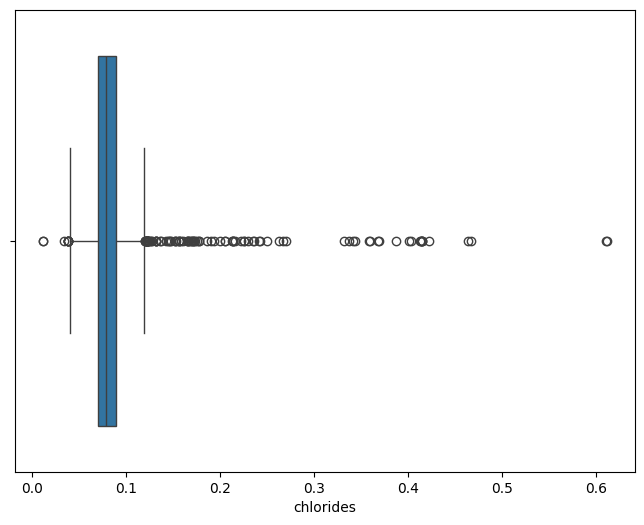

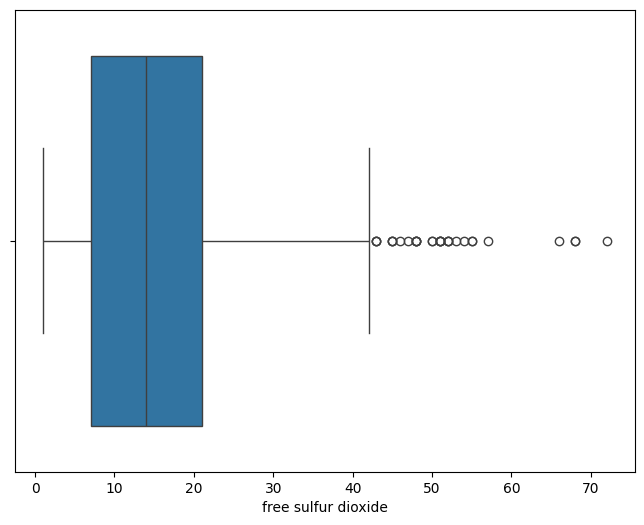

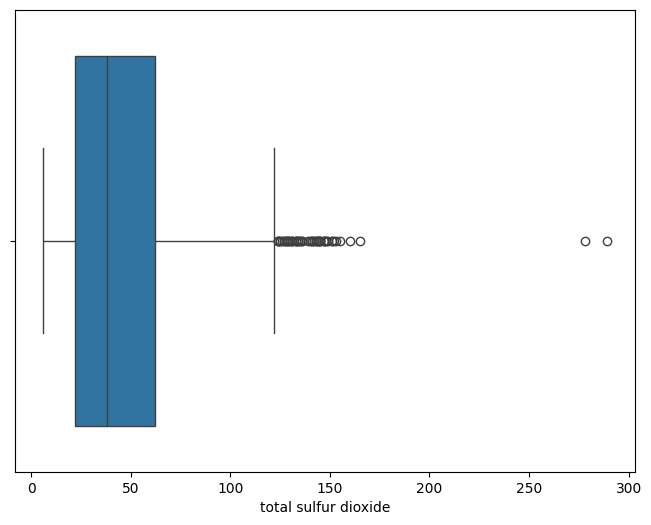

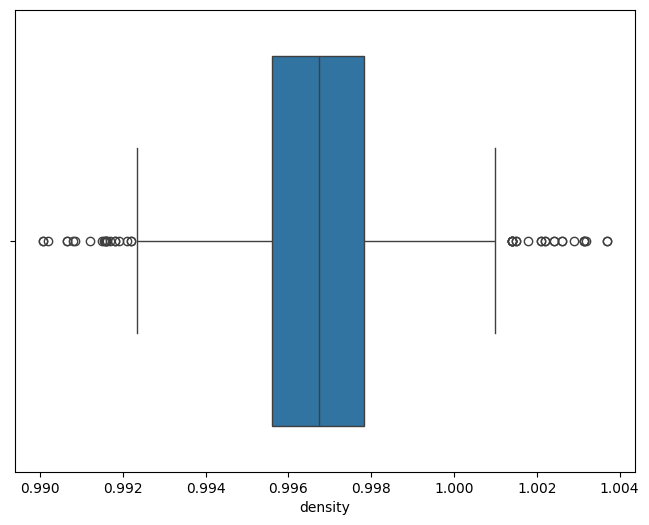

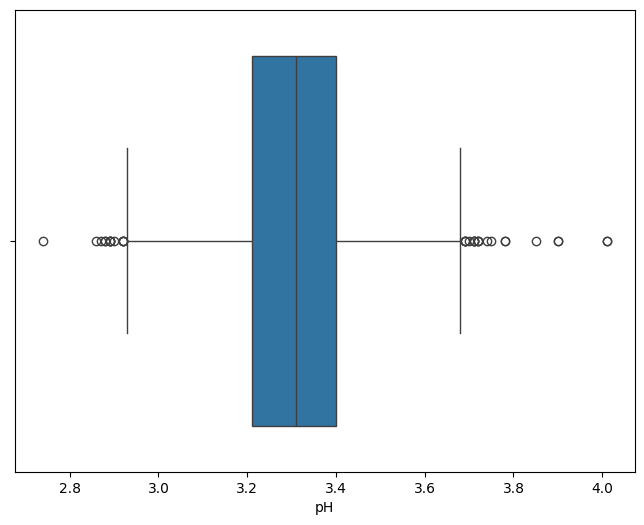

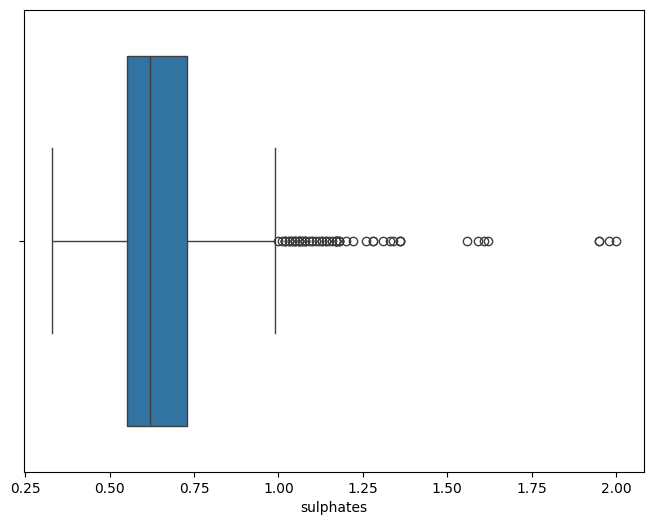

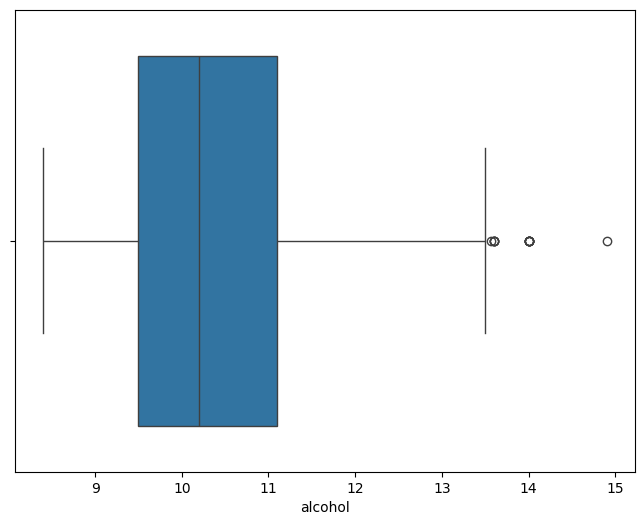

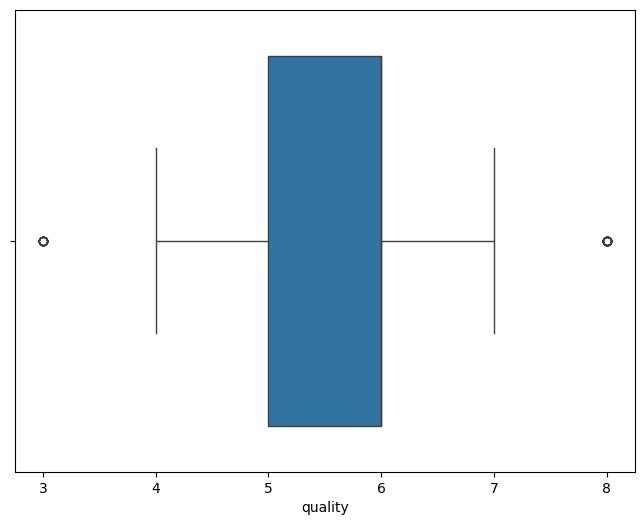

In [10]:
for i in df.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=i, data=df)
    plt.savefig(f"docs/boxplot_{i}.png")

From the boxplot above, we can see that some of important features like alcohol or sulphates still contain outliers. So we need remove them in later on data processing. Next we will confirm the visualization above using heatmap.

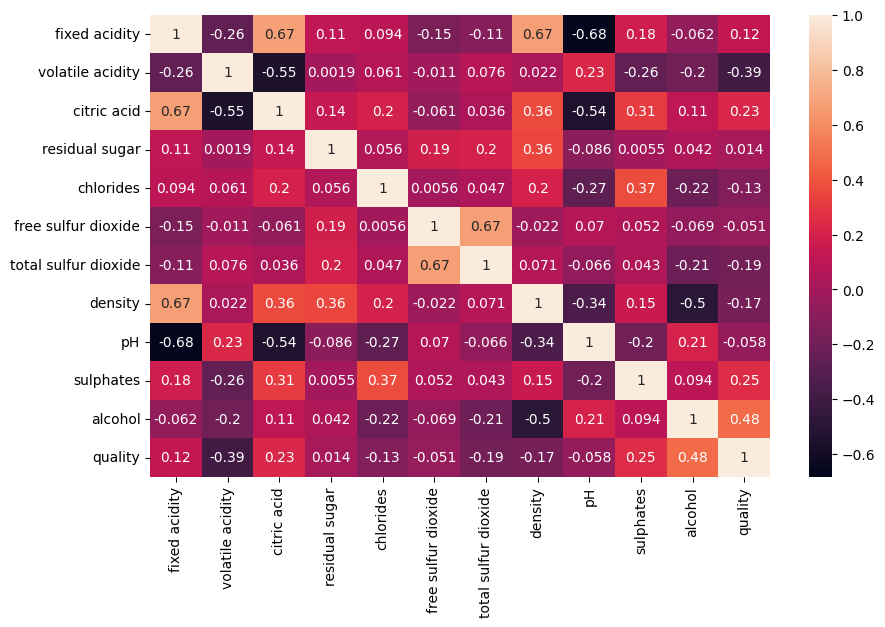

In [11]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True)
plt.savefig("docs/heatmap.png")

From the heatmap above, we found the same thing, that feature like alcohol and sulphates have high correlation to quality of the wine.

## Data Preparation
After doing some analysis, we will do data preparation like removing null values, duplicates, and outliers. We also will normalize the feature to make them have equall weights for the ML models.

In [12]:
clean_df = df.copy()

In [13]:
clean_df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

The dataset is already clean, so we don't need to drop any null values. But we will still need to clean the duplicates data and outlier especially from important features. Duplicates data sometimes make the data inbalance.

In [14]:
clean_df = clean_df.drop_duplicates()
clean_df.duplicated().sum()

0

After cleaning duplicate values, we will removing outlier from some of the important features. This is because outliers can make bias for the model.

In [15]:
corr = clean_df.corr()["quality"].sort_values(ascending=False)
corr

quality                 1.000000
alcohol                 0.480343
sulphates               0.248835
citric acid             0.228057
fixed acidity           0.119024
residual sugar          0.013640
free sulfur dioxide    -0.050463
pH                     -0.055245
chlorides              -0.130988
total sulfur dioxide   -0.177855
density                -0.184252
volatile acidity       -0.395214
Name: quality, dtype: float64

In [16]:
# select that have correlation > 0.2 (either positive or negative, but not including target values)
selected_cols = corr[abs(corr) > 0.2].index.tolist()
selected_cols.remove("quality")
selected_cols

['alcohol', 'sulphates', 'citric acid', 'volatile acidity']

In [17]:
# drop outliers of that features using IQR
for i in selected_cols:
    Q1 = clean_df[i].quantile(0.25)
    Q3 = clean_df[i].quantile(0.75)
    IQR = Q3 - Q1
    clean_df = clean_df[~((clean_df[i] < (Q1 - 1.5 * IQR)) | (clean_df[i] > (Q3 + 1.5 * IQR)))]

Next, we also need to convert the target values from 10 categories into 3 categories, because we want to classify whether the wine is having a bad, medium/average, or a good quality. This is also make the result more easy to deliver to the customer.

In [18]:
clean_df["quality"] = pd.cut(clean_df["quality"], bins=[0, 4, 6, 10], labels=["bad", "medium", "good"])
clean_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,medium
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,medium
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,medium
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,medium
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,medium
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,medium
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,medium
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,medium
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,medium


In [19]:
clean_df["quality"].value_counts()

quality
medium    1050
good       167
bad         51
Name: count, dtype: int64

In [20]:
# encode the target values, use 0 for bad, 1 for medium, and 2 for good
clean_df["quality"] = clean_df["quality"].map({"bad": 0, "medium": 1, "good": 2})

In [21]:
clean_df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1


The features are already cleaned, now we need to split for training and testing. Then we need transform it using standard scaler to make the data have equal weight, so it can increase the performance and reduce the bias of the ML models.

In [22]:
X = clean_df.drop("quality", axis=1)
y = clean_df["quality"]

# split data with 20% test size
# also use random_state to make it reproduceable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=14)

In [23]:
# fit transform X_train, but not X_test
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Modeling
Because the data processing is already done, next we will train a model to do the classification. We will use 3 models, KNN, SVM, and Random Forest. Those model are choosen because it some of the most common model used for classification.

In [24]:
# helper list to store the result
y_pred_list = []

In [25]:
# create knn model for classification
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [26]:
y_pred_list.append(y_pred)

In [27]:
# display knn model performance
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report: \n{classification_report(y_test, y_pred, zero_division=0)}")
print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")

Accuracy: 0.84251968503937
Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.89      0.93      0.91       219
           2       0.43      0.37      0.40        27

    accuracy                           0.84       254
   macro avg       0.44      0.43      0.44       254
weighted avg       0.82      0.84      0.83       254

Confusion Matrix: 
[[  0   8   0]
 [  2 204  13]
 [  1  16  10]]


In [28]:
# now create model using svm (svc for classification)
svc = SVC(C=1.0, kernel="rbf", gamma="scale")
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

In [29]:
y_pred_list.append(y_pred)

In [30]:
# display svm model performance
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report: \n{classification_report(y_test, y_pred, zero_division=0)}")
print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")


Accuracy: 0.8858267716535433
Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.89      0.99      0.94       219
           2       0.80      0.30      0.43        27

    accuracy                           0.89       254
   macro avg       0.56      0.43      0.46       254
weighted avg       0.85      0.89      0.85       254

Confusion Matrix: 
[[  0   8   0]
 [  0 217   2]
 [  0  19   8]]


In [31]:
# last, model using random forest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [32]:
y_pred_list.append(y_pred)

In [33]:
# display rf model performance
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report: \n{classification_report(y_test, y_pred, zero_division=0)}")
print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")

Accuracy: 0.8779527559055118
Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.89      0.98      0.93       219
           2       0.64      0.33      0.44        27

    accuracy                           0.88       254
   macro avg       0.51      0.44      0.46       254
weighted avg       0.84      0.88      0.85       254

Confusion Matrix: 
[[  0   8   0]
 [  0 214   5]
 [  0  18   9]]


## Evaluation

For evaluation, we will compare all of those model and use the accuracy, precision, recall, and F1 metrics to evaluate the model.

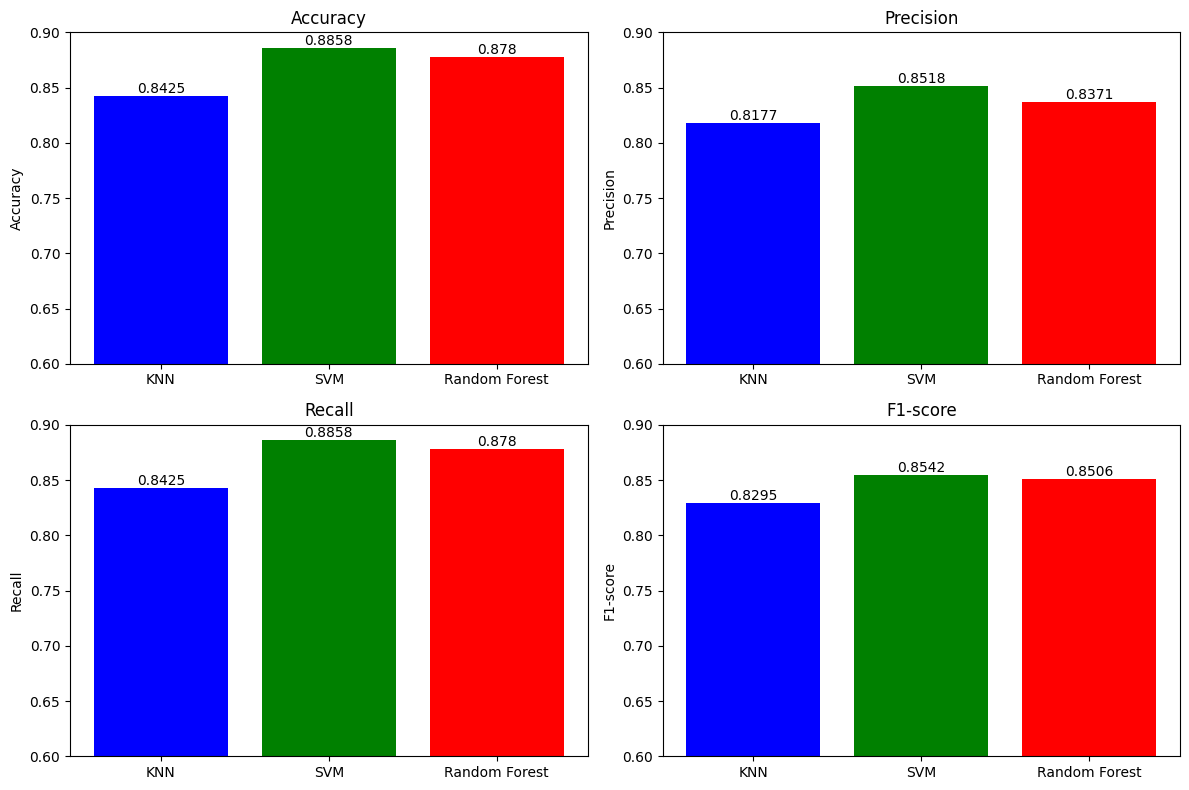

In [34]:
models = ['KNN', 'SVM', 'Random Forest']

accuracy = [accuracy_score(y_test, y_pred) for y_pred in y_pred_list]
precision = [precision_score(y_test, y_pred, average='weighted', zero_division=0) for y_pred in y_pred_list]
recall = [recall_score(y_test, y_pred, average='weighted', zero_division=0) for y_pred in y_pred_list]
f1 = [f1_score(y_test, y_pred, average='weighted') for y_pred in y_pred_list]

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

metrics = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-score': f1}

for i, (metric_name, metric_values) in enumerate(metrics.items()):
    ax = axs[i // 2, i % 2]
    bars = ax.bar(models, metric_values, color=['blue', 'green', 'red'])
    ax.set_title(metric_name)
    ax.set_ylabel(metric_name)
    ax.set_ylim(0.6, .9)
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), va='bottom', ha='center')

plt.tight_layout()
plt.savefig("docs/metrics_comparison.png")
plt.show()

From the visualization above, we can see that SVM is the best model for red wine classification. It surpass the others model in every matrics.